In [1]:
import numpy as np
import cv2
from PIL import Image
import glob
import matplotlib.pyplot as plt
from random import randint
from skimage import *
#import skimage.segmentation as seg
#import skimage.filters as filters 
#import skimage.draw as draw
#import skimage.color as color

# -------------------------------------------------------------
# Image resize, Face detetion and cropping
# -------------------------------------------------------------

In [2]:
initial_images=[]
for image_file in glob.glob("C:\\Users\\anshu\\minor_notebook\\Front\\*"):
    initial_images.append(image_file)
for image_file in glob.glob("C:/Users/anshu/minor_notebook/profile/*"):
    initial_images.append(image_file)
print(initial_images)

i=0
baseheight= 540
for file in initial_images:
    I= Image.open(file)
    print(I.size)
    hpercent= (baseheight/float(I.size[1]))
    wsize= int((float(I.size[0]) * float(hpercent)))
    I= I.resize((wsize,baseheight),Image.ANTIALIAS)
    print(I.size)
    I.save('C:/Users/anshu/Pictures/resize_new/res'+str(i)+".jpg")
    i=i+1

['C:\\Users\\anshu\\minor_notebook\\Front\\check.jpg', 'C:\\Users\\anshu\\minor_notebook\\Front\\pat.jpg', 'C:\\Users\\anshu\\minor_notebook\\Front\\personne01146+0+0.jpg', 'C:\\Users\\anshu\\minor_notebook\\Front\\personne01246+0+0.jpg', 'C:\\Users\\anshu\\minor_notebook\\Front\\personne02146+0+0.jpg', 'C:\\Users\\anshu\\minor_notebook\\Front\\personne02246+0+0.jpg', 'C:\\Users\\anshu\\minor_notebook\\Front\\personne03146+0+0.jpg', 'C:\\Users\\anshu\\minor_notebook\\Front\\personne03246+0+0.jpg', 'C:\\Users\\anshu\\minor_notebook\\Front\\personne04146+0+0.jpg', 'C:\\Users\\anshu\\minor_notebook\\Front\\personne04246+0+0.jpg', 'C:\\Users\\anshu\\minor_notebook\\Front\\personne05146+0+0.jpg', 'C:\\Users\\anshu\\minor_notebook\\Front\\personne05246+0+0.jpg', 'C:\\Users\\anshu\\minor_notebook\\Front\\personne06146+0+0.jpg', 'C:\\Users\\anshu\\minor_notebook\\Front\\personne06246+0+0.jpg', 'C:\\Users\\anshu\\minor_notebook\\Front\\personne07146+0+0.jpg', 'C:\\Users\\anshu\\minor_notebook\\

In [3]:
#frontal faces
frontal_list=[]
for file in glob.glob("Front/*"):
    frontal_list.append(file)
print(frontal_list)

['Front\\check.jpg', 'Front\\pat.jpg', 'Front\\personne01146+0+0.jpg', 'Front\\personne01246+0+0.jpg', 'Front\\personne02146+0+0.jpg', 'Front\\personne02246+0+0.jpg', 'Front\\personne03146+0+0.jpg', 'Front\\personne03246+0+0.jpg', 'Front\\personne04146+0+0.jpg', 'Front\\personne04246+0+0.jpg', 'Front\\personne05146+0+0.jpg', 'Front\\personne05246+0+0.jpg', 'Front\\personne06146+0+0.jpg', 'Front\\personne06246+0+0.jpg', 'Front\\personne07146+0+0.jpg', 'Front\\personne07246+0+0.jpg', 'Front\\personne08146+0+0.jpg', 'Front\\personne08246+0+0.jpg', 'Front\\personne09146+0+0.jpg', 'Front\\personne09246+0+0.jpg', 'Front\\personne10146+0+0.jpg', 'Front\\personne10246+0+0.jpg', 'Front\\personne11146+0+0.jpg', 'Front\\personne11246+0+0.jpg', 'Front\\personne12146+0+0.jpg', 'Front\\personne12246+0+0.jpg', 'Front\\personne13146+0+0.jpg', 'Front\\personne13246+0+0.jpg', 'Front\\personne14146+0+0.jpg', 'Front\\personne14246+0+0.jpg', 'Front\\personne15146+0+0.jpg', 'Front\\personne15246+0+0.jpg', '

In [4]:
#profile faces
prof_list=[]
for file in glob.glob("profile/*"):
    prof_list.append(file)
print(prof_list)

['profile\\pat1.jpg', 'profile\\pat2.jpg', 'profile\\pat3.jpg', 'profile\\pat4.jpg', 'profile\\person01128-15-75.jpg', 'profile\\person01139-15+90.jpg', 'profile\\person02115-30-75.jpg', 'profile\\person02124-30+60.jpg', 'profile\\person03128-15-75.jpg', 'profile\\person03139-15+90.jpg', 'profile\\person04113-60+90.jpg', 'profile\\person04114-30-90.jpg', 'profile\\person05115-30-75.jpg', 'profile\\person05125-30+75.jpg', 'profile\\person06115-30-75.jpg', 'profile\\person06125-30+75.jpg', 'profile\\person07114-30-90.jpg', 'profile\\person07123-30+45.jpg', 'profile\\person08116-30-60.jpg', 'profile\\person08138-15+75.jpg', 'profile\\person09114-30-90.jpg', 'profile\\person09125-30+75.jpg', 'profile\\person10115-30-75.jpg', 'profile\\person10138-15+75.jpg', 'profile\\person11114-30-90.jpg', 'profile\\person11117-30-45.jpg', 'profile\\person11123-30+45.jpg', 'profile\\person11126-30+90.jpg', 'profile\\person12114-30-90.jpg', 'profile\\person12117-30-45.jpg', 'profile\\person12122-30+30.jpg

In [5]:
def frontal(initial_images):
    count= 0
    ncount=0
    for f in initial_images:
        img= cv2.imread(f,cv2.IMREAD_COLOR)
        icopy= img.copy()
        itest= cv2.cvtColor(icopy,cv2.COLOR_BGR2GRAY)

        faceCascade= cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

        face= faceCascade.detectMultiScale(itest,scaleFactor=2,minNeighbors= 3)

        if(len(face)==0):
            ncount=ncount+1
            print('frontal face not found')
        else:count= count+1;print('frontal face detected');


        for (x,y,w,h) in face:
            face_detect= cv2.rectangle(itest,(x,y),(x+w,y+h),(0,255,0),2)
            grey= itest[y:y+h,x:x+w]
            color= itest[y:y+h,x:x+w]
            extract= img[y-20:y+h+20,x-20:x+w+20]
            cv2.imwrite("extracted/f"+str(randint(0,1000))+".jpg",extract)
            plt.imshow(face_detect)
            plt.show()
    print('total number of frontal faces detected is : ',count)
    print('total number of undetected faces :',ncount)
    profile(initial_images)
    return

In [6]:
def profile(initial_images):
    pcount=0
    upcount=0
    for pro in initial_images:
        prf= cv2.imread(pro,cv2.IMREAD_COLOR)
        pcopy= prf.copy()
        ptest= cv2.cvtColor(pcopy,cv2.COLOR_BGR2GRAY)

        prof_cascade= cv2.CascadeClassifier('haarcascade_profileface.xml')

        p= prof_cascade.detectMultiScale(ptest,scaleFactor= 2,minNeighbors=2)

        if(len(p)==0):
            upcount=upcount+1
            print("face not found")
        else: pcount=pcount+1;print("face detected");

        for (px,py,pw,ph) in p:
            pface= cv2.rectangle(ptest,(px,py),(px+pw,py+ph),(0,255,0),2)
            pgrey= pface[py:px+ph,px:px+pw]
            pcolor= pface[py:px+ph,px:px+pw]
            pextract= prf[py-20:py+ph+20,px-20:px+pw+20]
            cv2.imwrite("extracted/p"+str(randint(0,1000))+".jpg",pextract)
            plt.imshow(pface)
            plt.show()

    print('total number of profile faces detected is :',pcount )
    print('total number of undetected profile faces is :',upcount)
    return

frontal face not found
frontal face detected


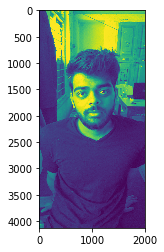

frontal face detected


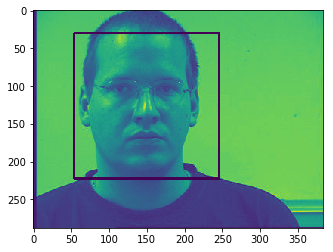

frontal face detected


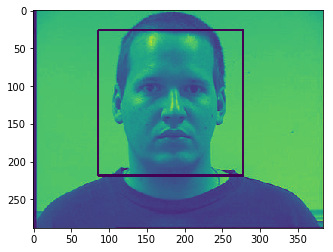

frontal face detected


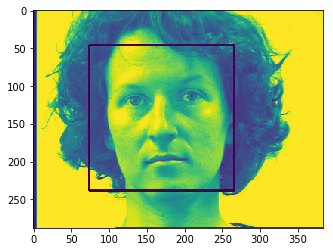

frontal face detected


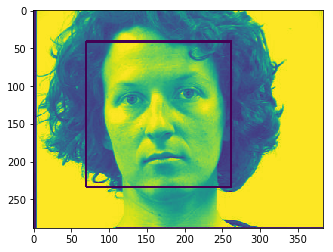

frontal face detected


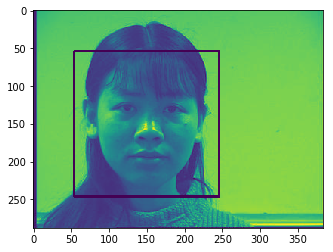

frontal face detected


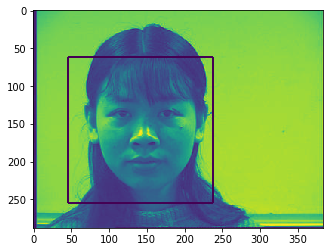

frontal face detected


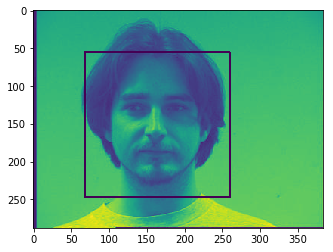

frontal face detected


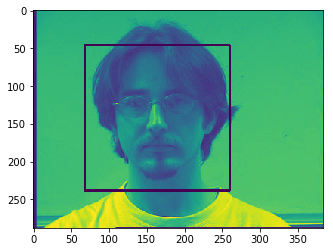

frontal face not found
frontal face detected


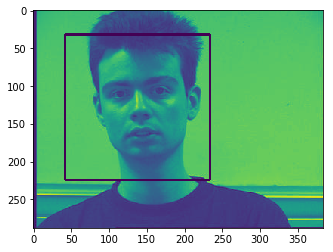

frontal face not found
frontal face not found
frontal face detected


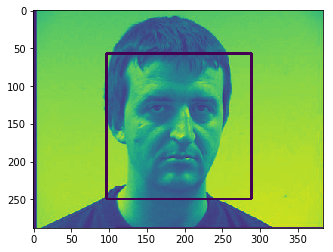

frontal face detected


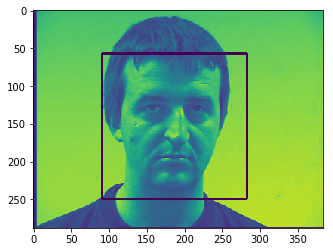

frontal face not found
frontal face not found
frontal face detected


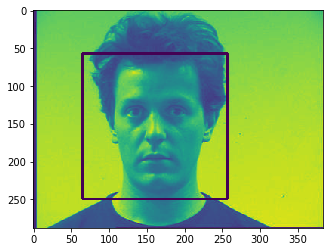

frontal face not found
frontal face detected


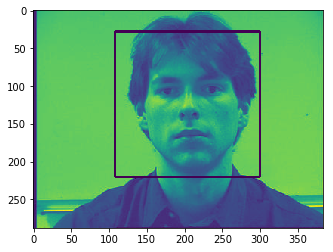

frontal face detected


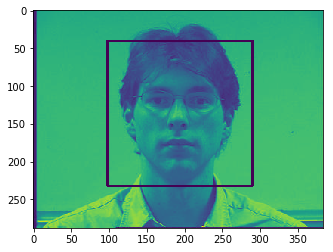

frontal face detected


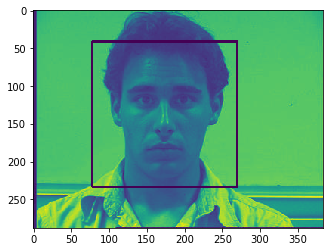

frontal face detected


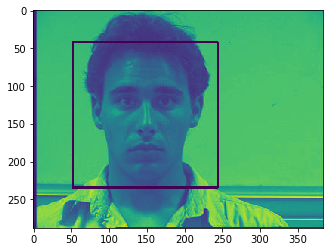

frontal face not found
frontal face detected


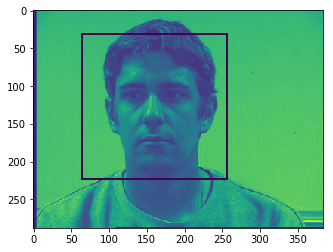

frontal face detected


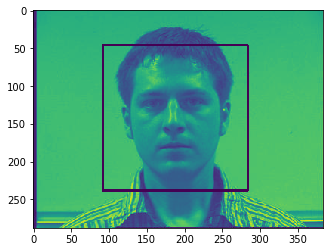

frontal face detected


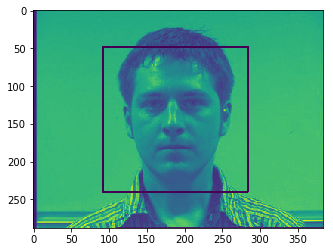

frontal face detected


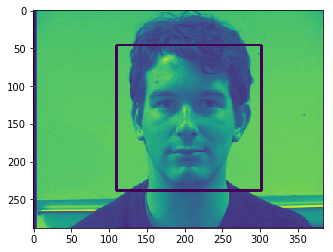

frontal face detected


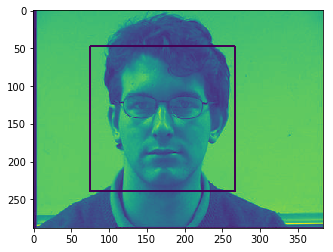

frontal face detected


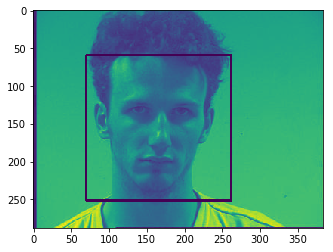

frontal face detected


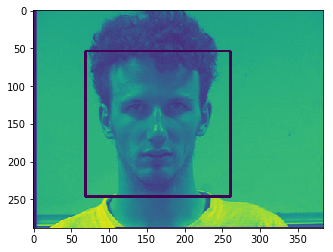

frontal face detected


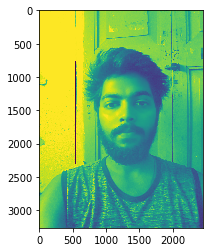

frontal face detected


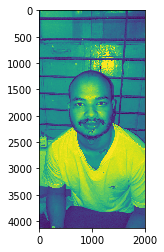

frontal face detected


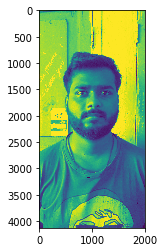

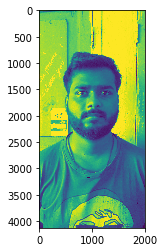

frontal face detected


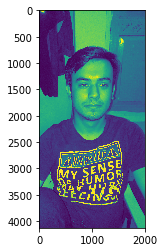

frontal face detected


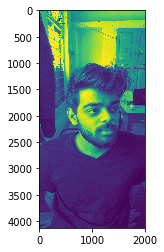

frontal face not found
frontal face not found
frontal face not found
frontal face not found
frontal face not found
frontal face not found
frontal face not found
frontal face not found
frontal face not found
frontal face not found
frontal face not found
frontal face not found
frontal face not found
frontal face not found
frontal face not found
frontal face not found
frontal face detected


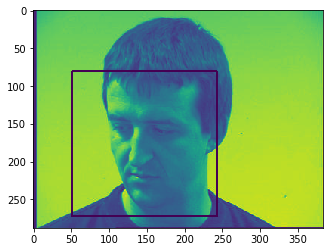

frontal face not found
frontal face not found
frontal face not found
frontal face not found
frontal face not found
frontal face not found
frontal face not found
frontal face not found
frontal face not found
frontal face not found
frontal face not found
frontal face not found
frontal face not found
frontal face not found
frontal face not found
frontal face detected


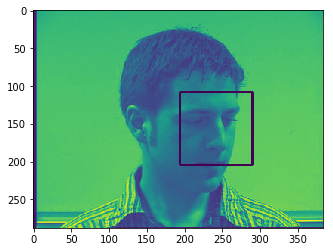

frontal face detected


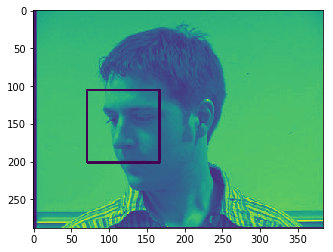

frontal face not found
frontal face not found
frontal face detected


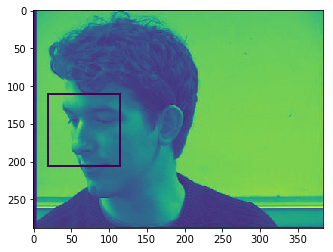

frontal face not found
frontal face not found
frontal face not found
frontal face not found
frontal face not found
frontal face not found
frontal face detected


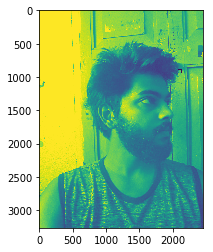

frontal face detected


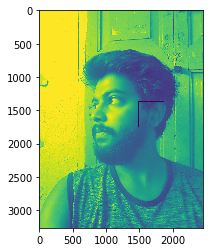

frontal face detected


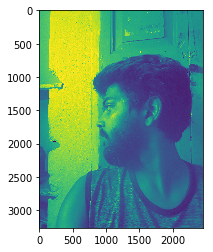

frontal face not found
frontal face detected


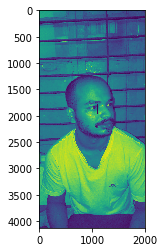

frontal face not found
frontal face detected


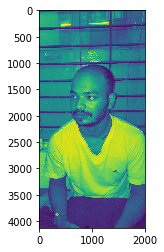

frontal face not found
frontal face not found
frontal face not found
frontal face detected


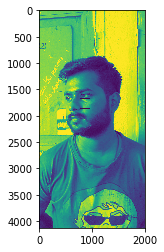

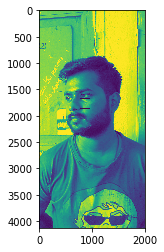

frontal face not found
frontal face not found
frontal face detected


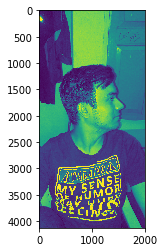

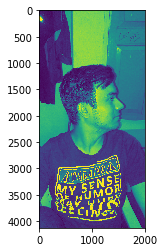

frontal face not found
frontal face not found
total number of frontal faces detected is :  40
total number of undetected faces : 56
face not found
face not found
face not found
face not found
face not found
face not found
face not found
face not found
face not found
face not found
face detected


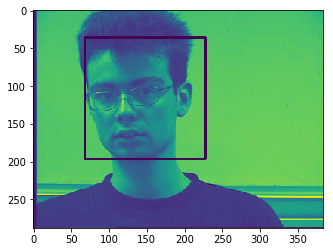

face not found
face not found
face not found
face not found
face not found
face not found
face not found
face not found
face not found
face not found
face not found
face not found
face not found
face not found
face not found
face not found
face not found
face not found
face not found
face not found
face not found
face detected


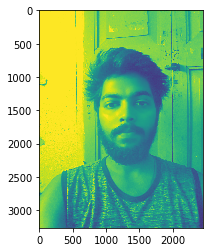

face not found
face not found
face not found
face not found
face not found
face not found
face detected


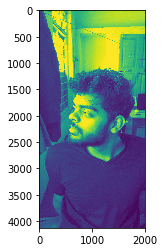

face not found
face detected


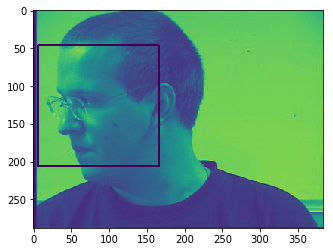

face not found
face not found
face not found
face detected


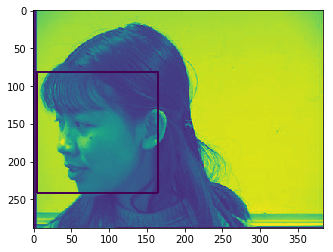

face not found
face not found
face not found
face detected


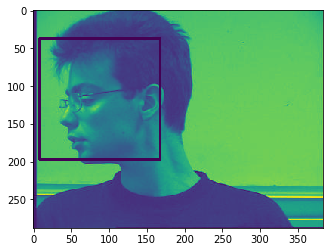

face not found
face not found
face not found
face detected


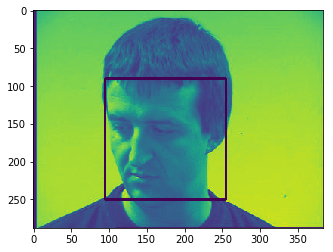

face not found
face detected


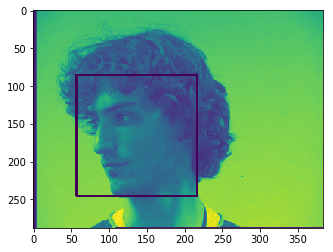

face not found
face not found
face not found
face detected


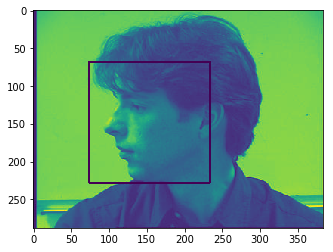

face not found
face not found
face not found
face not found
face not found
face not found
face detected


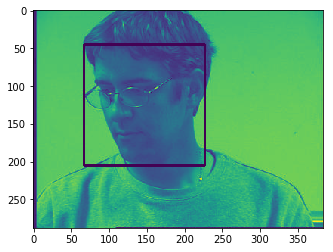

face not found
face not found
face not found
face detected


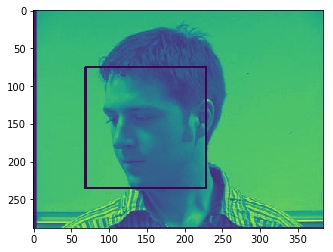

face detected


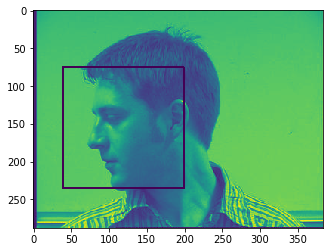

face not found
face detected


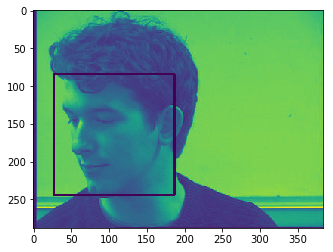

face not found
face not found
face not found
face not found
face not found
face not found
face not found
face detected


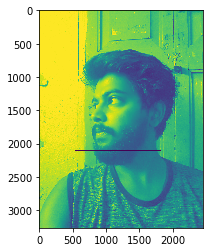

face not found
face not found
face not found
face not found
face not found
face not found
face not found
face not found
face detected


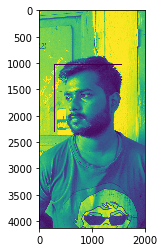

face detected


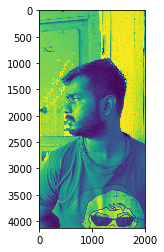

face not found
face not found
face detected


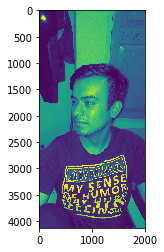

face detected


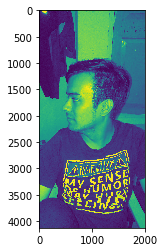

total number of profile faces detected is : 18
total number of undetected profile faces is : 78


In [7]:
#calling the frontal face detection method
frontal(initial_images)

### total number of frontal faces = 36
### number of faces detected correctly = 28
### accuracy = 77.77%

### total number of profile faces = 60
### number of faces detected correcty = 18
### only right profile faces detected.
### accuracy = 30%

# ----------------------------------------------------------------------------
# face cartoon
# ----------------------------------------------------------------------------

In [8]:
extracted_images= []
for file in glob.glob("extracted/*"):
    extracted_images.append(file)
print(len(extracted_images))
print(extracted_images)

122
['extracted\\f100.jpg', 'extracted\\f106.jpg', 'extracted\\f114.jpg', 'extracted\\f129.jpg', 'extracted\\f137.jpg', 'extracted\\f149.jpg', 'extracted\\f165.jpg', 'extracted\\f171.jpg', 'extracted\\f174.jpg', 'extracted\\f208.jpg', 'extracted\\f211.jpg', 'extracted\\f216.jpg', 'extracted\\f246.jpg', 'extracted\\f265.jpg', 'extracted\\f269.jpg', 'extracted\\f282.jpg', 'extracted\\f312.jpg', 'extracted\\f330.jpg', 'extracted\\f34.jpg', 'extracted\\f343.jpg', 'extracted\\f359.jpg', 'extracted\\f362.jpg', 'extracted\\f388.jpg', 'extracted\\f409.jpg', 'extracted\\f440.jpg', 'extracted\\f450.jpg', 'extracted\\f453.jpg', 'extracted\\f460.jpg', 'extracted\\f471.jpg', 'extracted\\f490.jpg', 'extracted\\f502.jpg', 'extracted\\f522.jpg', 'extracted\\f529.jpg', 'extracted\\f549.jpg', 'extracted\\f558.jpg', 'extracted\\f571.jpg', 'extracted\\f574.jpg', 'extracted\\f575.jpg', 'extracted\\f582.jpg', 'extracted\\f587.jpg', 'extracted\\f592.jpg', 'extracted\\f601.jpg', 'extracted\\f605.jpg', 'extrac

In [9]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

In [10]:
def image_overlay(z,image):
    image= cv2.fastNlMeansDenoising(image,50,7,21)
    org= image
    image= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    ed= cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,15,3)
    ed= cv2.fastNlMeansDenoising(ed,10,7,21)
    ed= cv2.fastNlMeansDenoising(ed,50,7,21)
    ed= cv2.cvtColor(ed, cv2.COLOR_GRAY2RGB)
    alpha= 0.25
    beta= (1-alpha)
    dst= cv2.addWeighted(z,0.9,ed,0.25,0.0)#overlaying images on top of each other
    dst= cv2.cvtColor(dst,cv2.COLOR_BGR2RGB)
    #cv2.imwrite("cartoons/cartoon"+str(randint(0,1000))+".jpg",dst)
    cv2.imwrite("cartoon_new1/cartoon"+str(randint(0,1000))+".jpg",dst)

    return

In [11]:
import skimage.color as color
import skimage.segmentation as seg
for file in extracted_images:
    image= cv2.imread(file)
    image= cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image_grey= color.rgb2gray(image)
    #image_show(image_grey)
    image_slic = seg.slic(image,n_segments=(1024))# segmentation of the image using k-means clustering
    z=color.label2rgb(image_slic, image, kind='avg')# coloring of the image usign the color labels generated in the previous step
    image_overlay(z,image)